# Friendship-collaboration analysis

This notebook analyzes the correlations between the friendship-Graph and the collaboration-Graph.

As we can see from the following code the two graphs have the same nodes.

In [1]:
import matplotlib.pyplot as plt
from random import sample 
import networkx as nx
import numpy as np
import pickle

file = open('friendshipGraph.pckl', 'rb')
friendshipGraph = pickle.load(file)
file.close()

file = open('collaborationGraph.pckl', 'rb')
collaborationGraph = pickle.load(file)
file.close()

print(friendshipGraph.number_of_nodes())
print(collaborationGraph.number_of_nodes())
set(friendshipGraph.nodes) == set(collaborationGraph.nodes)

3038
3038


True

**friend_col** is a dictionary having as keys the user names and as value a pair. The first pair element indicates the number of friends that the related user has, while the second indicates the number of collaborations.

In [4]:
nodes = set(friendshipGraph.nodes) #equally, nodes = set(collaborationGraph.nodes)
friend_col = {}

for n in nodes:
    friend_col[n] = (len(list(friendshipGraph.neighbors(n))), len(list(collaborationGraph.neighbors(n))))
    
for k in sample(nodes, 10):
    print(k + ": " + str(friend_col[k]))

Sir_Mr_The_3rd_Esq: (0, 0)
Kokorogumi: (0, 0)
Hester: (0, 0)
nyanpasu: (0, 0)
laadamro: (0, 0)
Lissasam: (0, 0)
Denkdevil: (1, 0)
Briiiiiiii: (0, 0)
Adarsh_Kd: (0, 7)
Willgex: (0, 0)


**friendships** is a list containing the number of friends of each users.
The histogram shows the number of users (**y** axis) that have a specific number of friends (**x** axis).

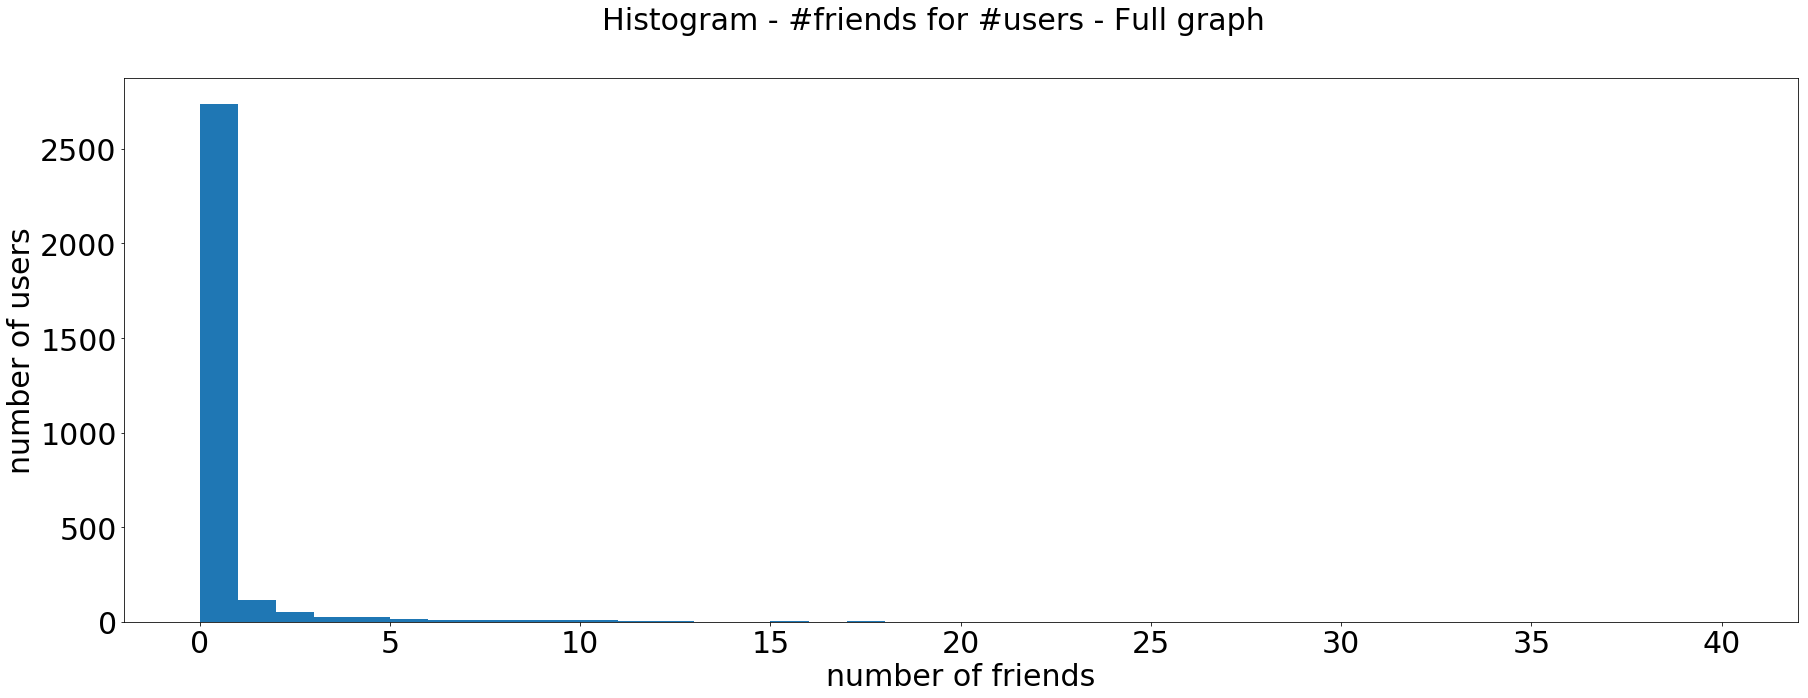

Minumum number of friends:  0
Maximum number of friends:  41


In [8]:
friendships = [tpl[0] for tpl in list(friend_col.values())]
plt.hist(friendships, bins=np.arange(min(friendships), max(friendships)))
plt.rcParams['figure.figsize'] = [30, 10]
plt.suptitle('Histogram - #friends for #users - Full graph', fontsize=30)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('xlabel', fontsize=30)
plt.ylabel('ylabel', fontsize=30)
plt.xlabel('number of friends')
plt.ylabel('number of users')
plt.show()
print('Minumum number of friends: ', min(friendships))
print('Maximum number of friends: ', max(friendships))

**collaborations** is a list containing the number of collaborations of each users.
The histogram shows the number of users (**y** axis) that have a specific number of collaborations (**x** axis).

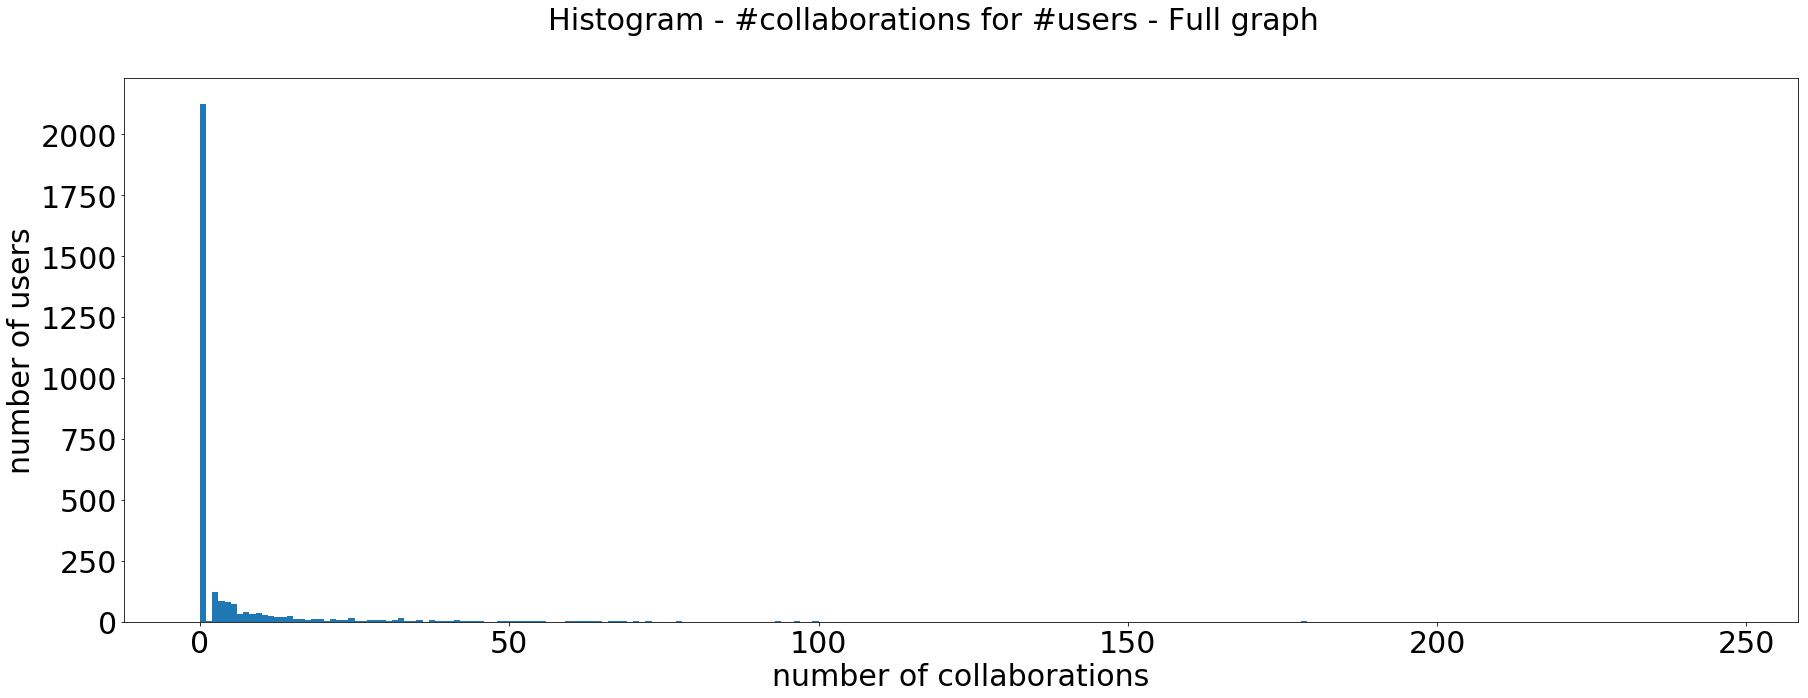

Minumum number of collaborations:  0
Maximum number of collaborations:  247


In [9]:
collaborations = [tpl[1] for tpl in list(friend_col.values())]
plt.hist(collaborations, bins=np.arange(min(collaborations), max(collaborations)))
plt.suptitle('Histogram - #collaborations for #users - Full graph', fontsize=30)
plt.rcParams['figure.figsize'] = [30, 10]
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('xlabel', fontsize=30)
plt.ylabel('ylabel', fontsize=30)
plt.xlabel('number of collaborations')
plt.ylabel('number of users')
plt.show()
print('Minumum number of collaborations: ', min(collaborations))
print('Maximum number of collaborations: ', max(collaborations))

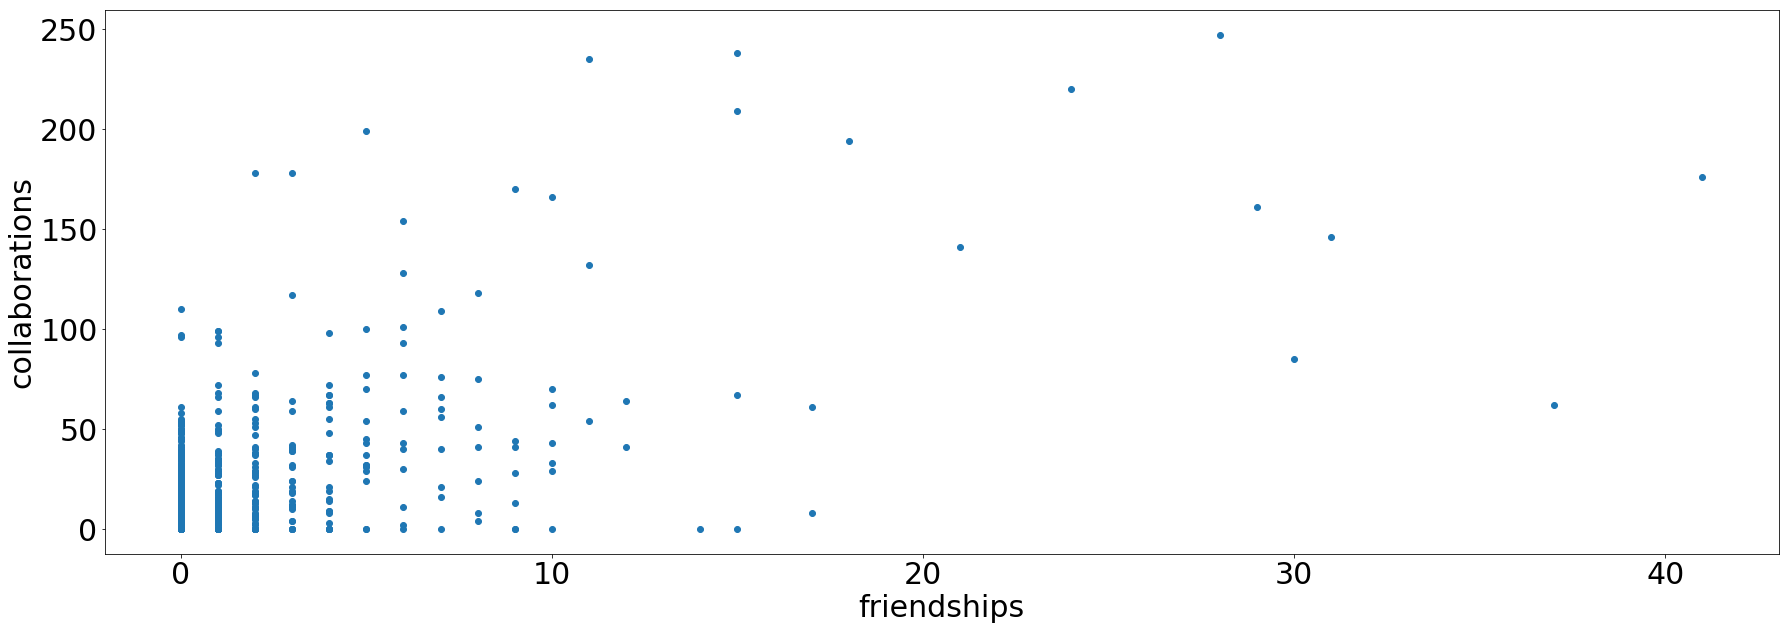

In [10]:
plt.scatter(friendships, collaborations)
plt.xlabel('xlabel', fontsize=30)
plt.ylabel('ylabel', fontsize=30)
plt.xlabel('friendships')
plt.ylabel('collaborations')
plt.show()


In [11]:
print("The Pearson's correlation coefficient for the full graph is: ", (np.corrcoef(friendships, collaborations))[0][1])

The Pearson's correlation coefficient for the full graph is:  0.648312599602126


The following code can be easily modified to create a customized subset of nodes.

In [13]:
conn_comp_collaboration = sorted(nx.connected_components(collaborationGraph), key=len, reverse=True)
conn_comp_friendship = sorted(nx.connected_components(friendshipGraph), key=len, reverse=True)

print('Number of connected components of collaboration graph: ', len(conn_comp_collaboration))
print('Number of connected components of friendship graph: ', len(conn_comp_friendship))

subnet_nodes = set()

for k in range(0, 1):
    subnet_nodes = subnet_nodes.union(conn_comp_collaboration[k])
    #subnet_nodes = subnet_nodes.union(conn_comp_friendship[k])

print('Number of subnet nodes: ', len(subnet_nodes))

Number of connected components of collaboration graph:  2124
Number of connected components of friendship graph:  2752
Number of subnet nodes:  915


Then we repeate the analysis done before on the subnet.

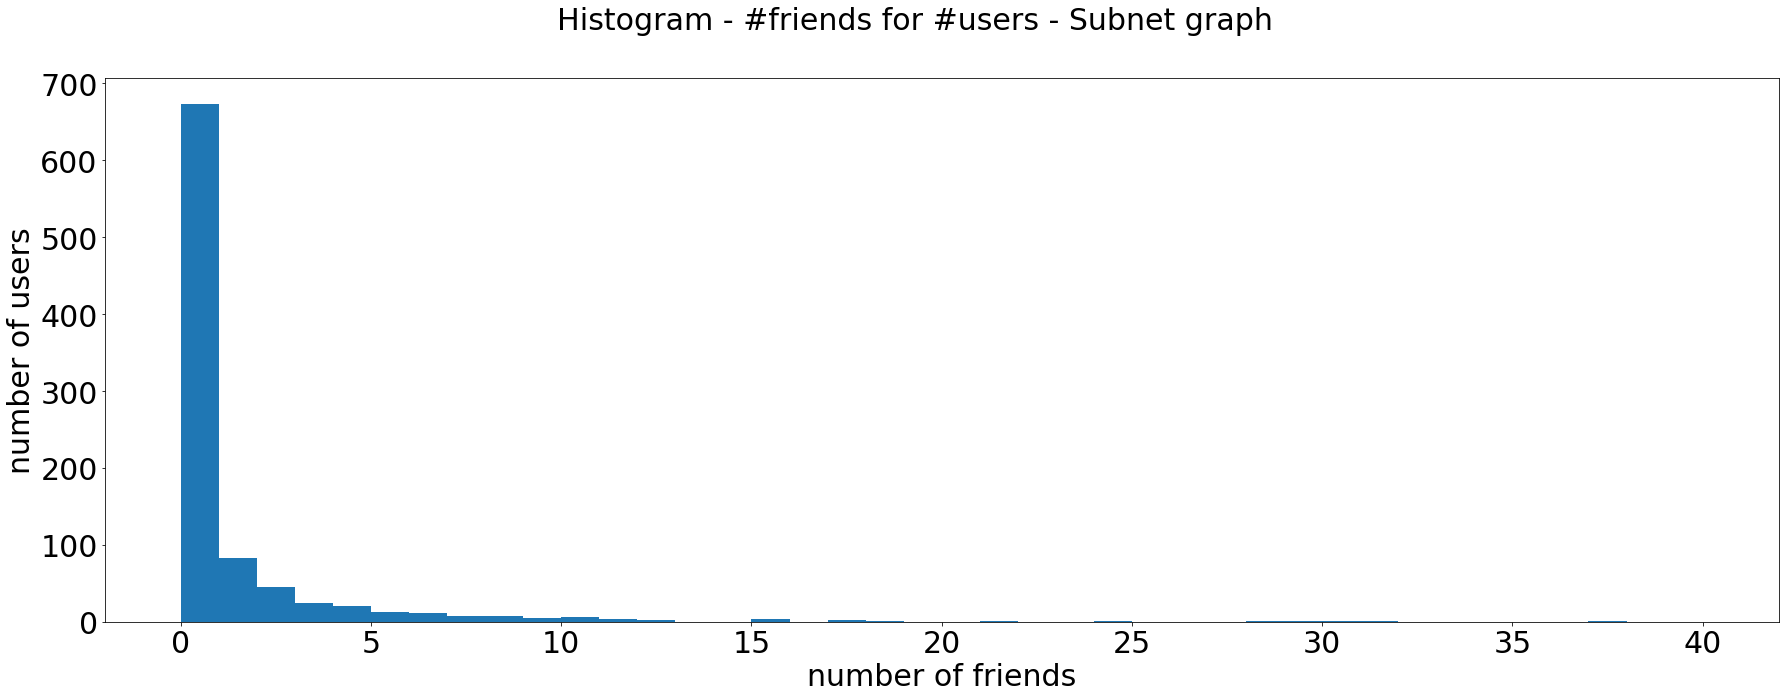

In [15]:
friendships_subnet = [tpl[0] for tpl in list(friend_col_subnet.values())]
plt.hist(friendships_subnet, bins=np.arange(min(friendships_subnet), max(friendships_subnet)))
plt.rcParams['figure.figsize'] = [30, 10]
plt.suptitle('Histogram - #friends for #users - Subnet graph', fontsize=30)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('xlabel', fontsize=30)
plt.ylabel('ylabel', fontsize=30)
plt.xlabel('number of friends')
plt.ylabel('number of users')
plt.show()

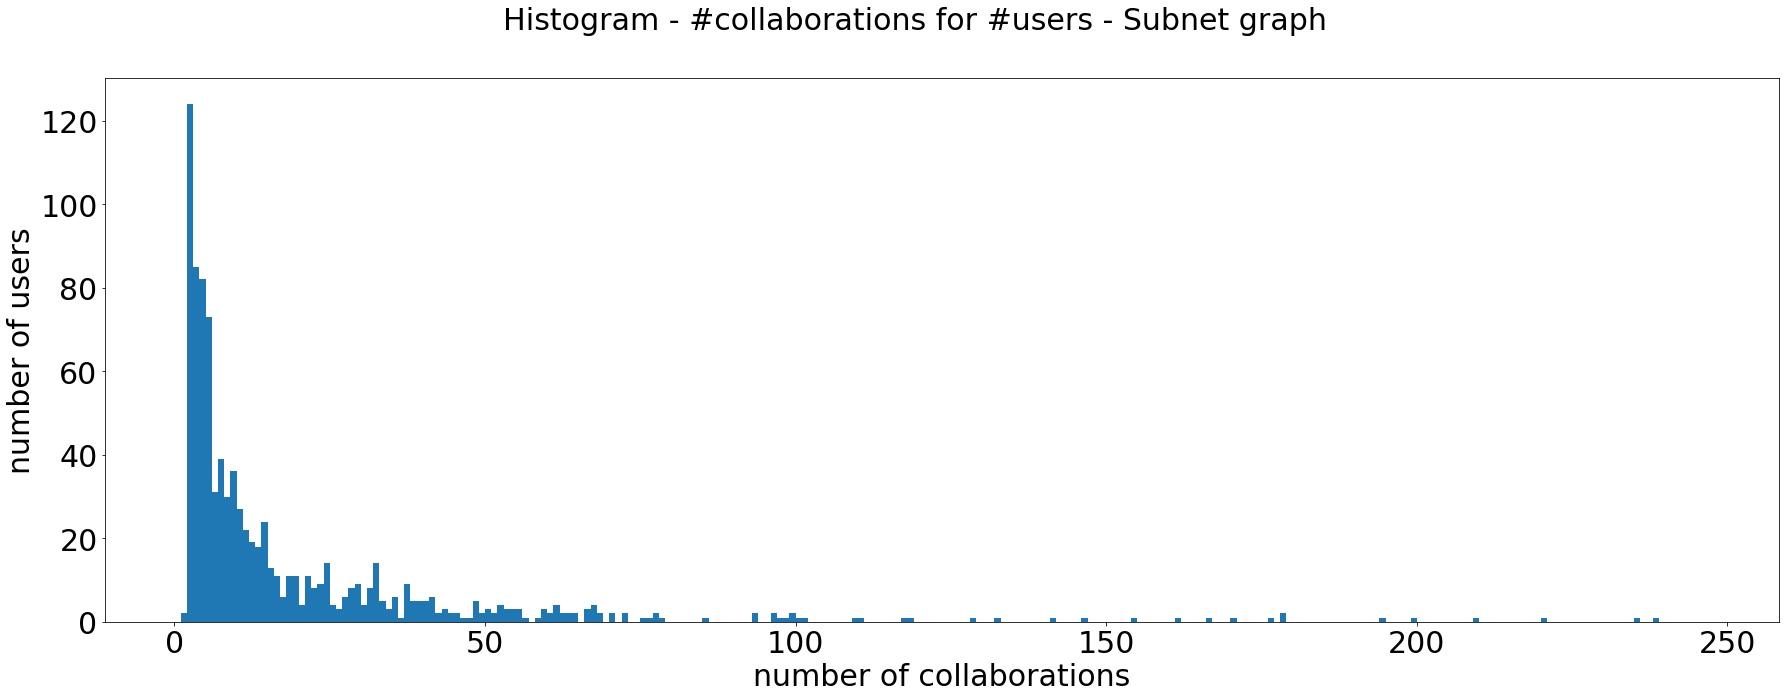

In [16]:
collaborations_subnet = [tpl[1] for tpl in list(friend_col_subnet.values())]
plt.hist(collaborations_subnet, bins=np.arange(min(collaborations_subnet), max(collaborations_subnet)))
plt.suptitle('Histogram - #collaborations for #users - Subnet graph', fontsize=30)
plt.rcParams['figure.figsize'] = [30, 10]
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('xlabel', fontsize=30)
plt.ylabel('ylabel', fontsize=30)
plt.xlabel('number of collaborations')
plt.ylabel('number of users')
plt.show()

The points in blu represent the user of the subnet, while the points in red represent the remaining nodes.

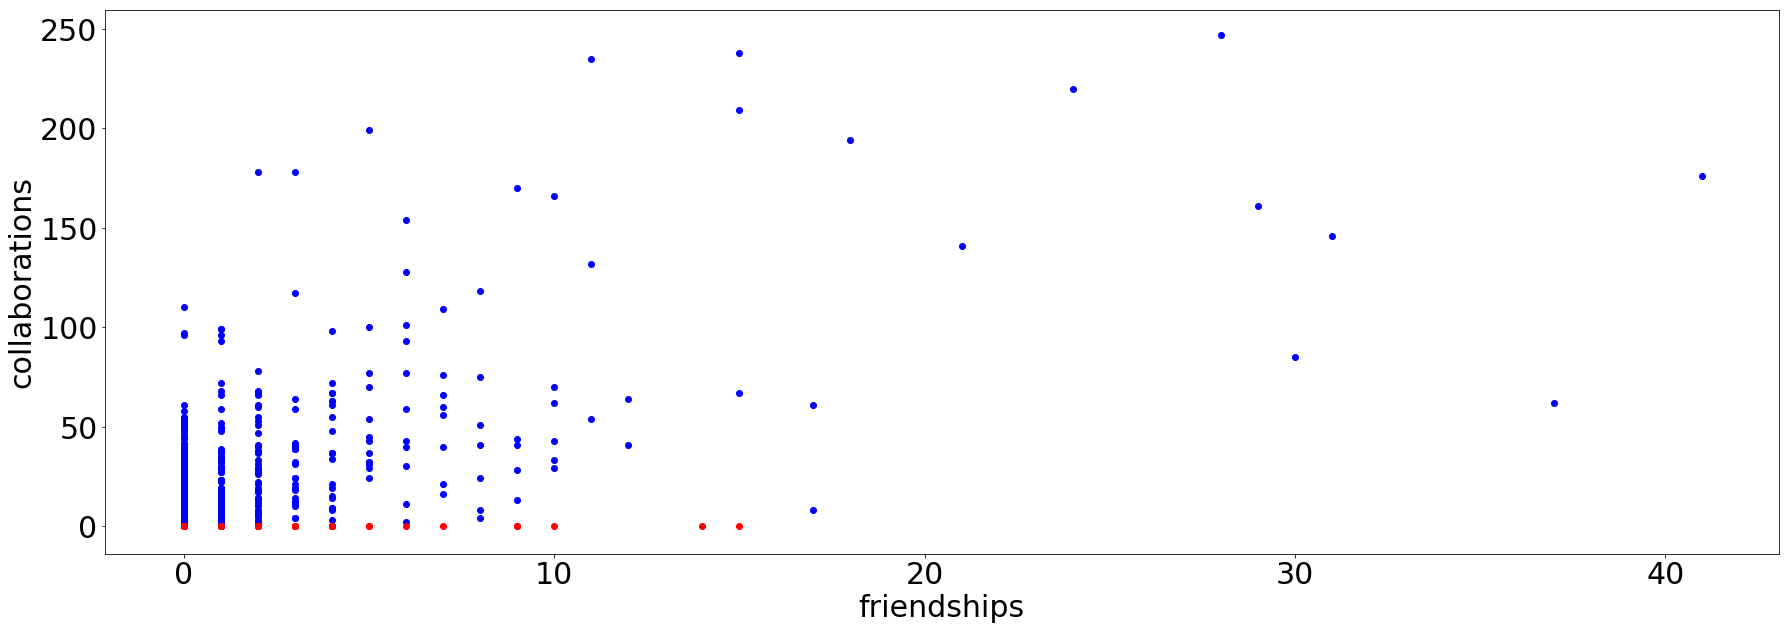

In [17]:
friendships_lackers = []
collaborations_lackers = []

for k in nodes - subnet_nodes:
    friendships_lackers.append(friend_col[k][0])
    collaborations_lackers.append(friend_col[k][1])

plt.scatter(friendships_subnet, collaborations_subnet, color="blue")
plt.scatter(friendships_lackers, collaborations_lackers, color="red")
plt.xlabel('xlabel', fontsize=30)
plt.ylabel('ylabel', fontsize=30)
plt.xlabel('friendships')
plt.ylabel('collaborations')
plt.show()

In [18]:
print("The Pearson's correlation coefficient for the subnet graph is: ", (np.corrcoef(friendships_subnet, collaborations_subnet))[0][1])

The Pearson's correlation coefficient for the subnet graph is:  0.651105347594526


We repeate the analysis done before considering the weights. The **friend_col_subnet_weighted** has the usual structure, but the second element of the tuples represent the sum of all the weights related to a specific node.

In [26]:
friend_col_subnet_weighted = {}

for n in subnet_nodes:
    friend_col_subnet_weighted[n] = (len(list(friendshipGraph.neighbors(n))), collaborationGraph.degree(weight="weight")[n])

for k in sample(subnet_nodes, 10):
    print(k + ": " + str(friend_col_subnet_weighted[k]))

zircbirb: (0, 3)
SwegGreg: (0, 4)
argos: (0, 5)
map*entertainments: (1, 19)
The%20Burned%20Man: (4, 102)
Schiggysam: (0, 71)
So_what287: (0, 16)
MissSezia: (4, 22)
Sebby: (0, 3)
Nokia3310: (0, 5)


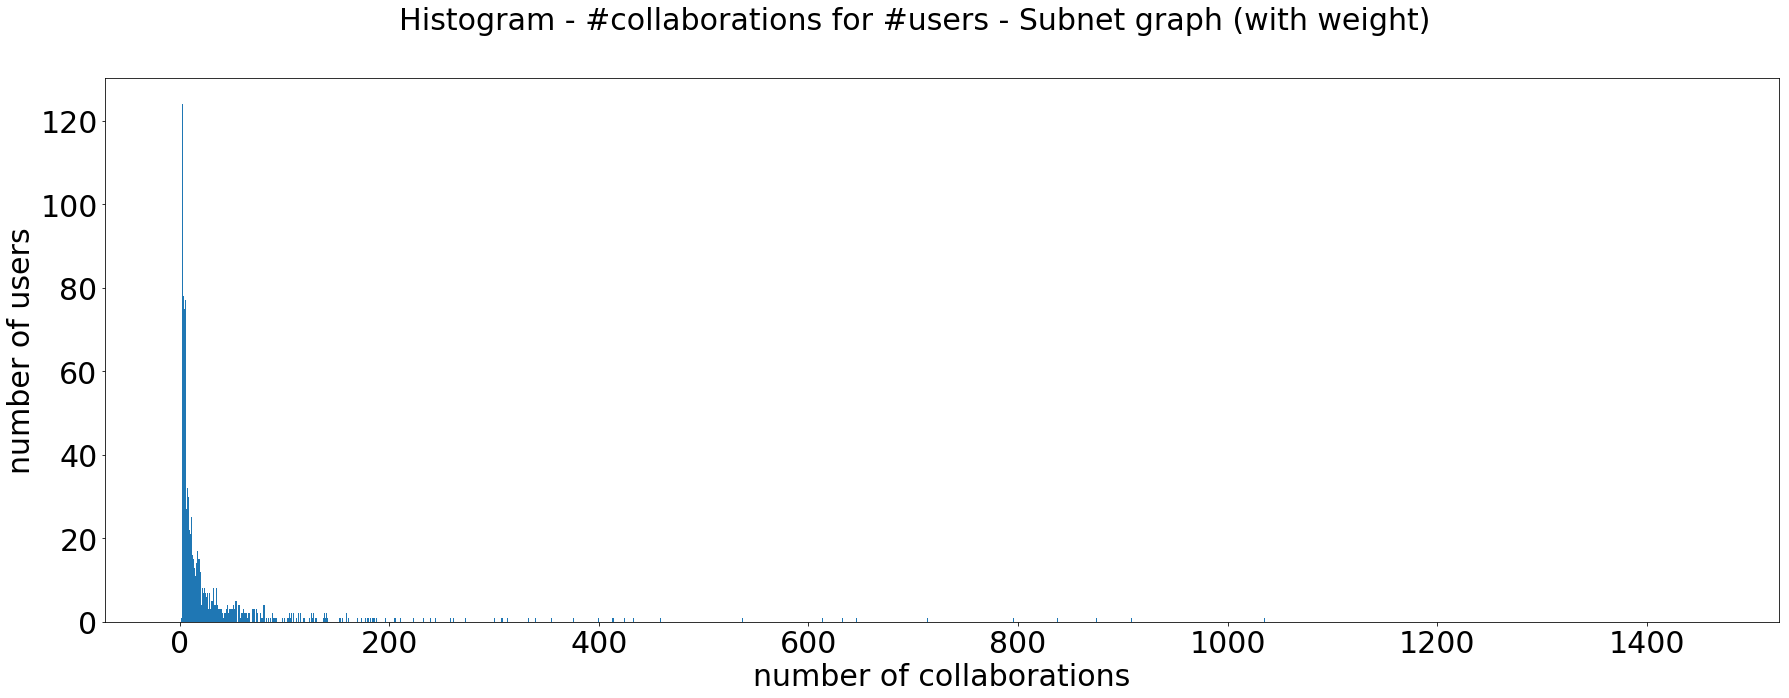

In [23]:
collaborations_subnet_weighted = [tpl[1] for tpl in list(friend_col_subnet_weighted.values())]
plt.hist(collaborations_subnet_weighted, bins=np.arange(min(collaborations_subnet_weighted), max(collaborations_subnet_weighted)))
plt.suptitle('Histogram - #collaborations for #users - Subnet graph (with weight)', fontsize=30)
plt.rcParams['figure.figsize'] = [30, 10]
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('xlabel', fontsize=30)
plt.ylabel('ylabel', fontsize=30)
plt.xlabel('number of collaborations')
plt.ylabel('number of users')
plt.show()

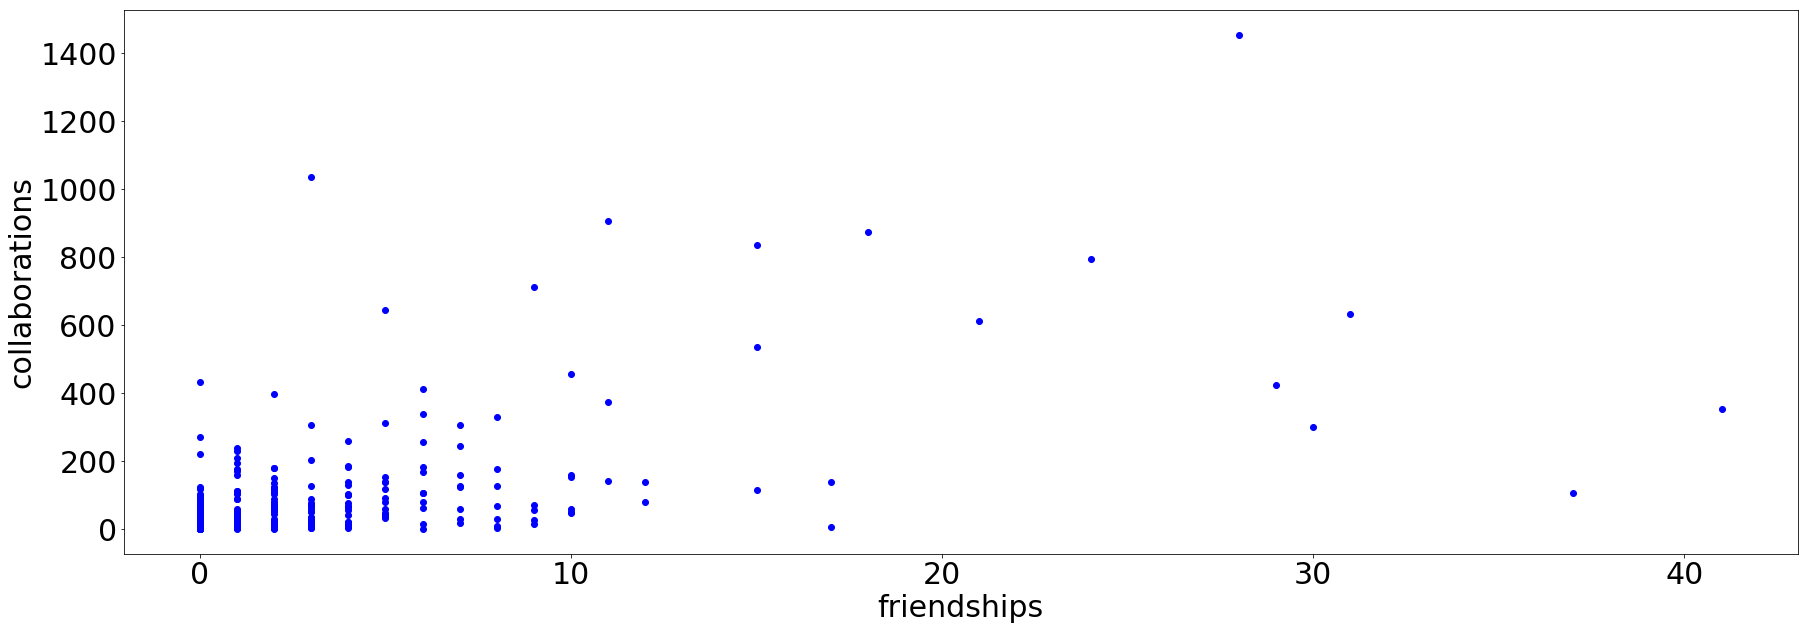

In [24]:
friendships_subnet_weighted = [tpl[0] for tpl in list(friend_col_subnet_weighted.values())]

plt.scatter(friendships_subnet_weighted, collaborations_subnet_weighted, color="blue")
plt.xlabel('xlabel', fontsize=30)
plt.ylabel('ylabel', fontsize=30)
plt.xlabel('friendships')
plt.ylabel('collaborations')
plt.show()

In [27]:
print("The Pearson's correlation coefficient for the subnet graph (considering the weights) is: ", (np.corrcoef(friendships_subnet_weighted, collaborations_subnet_weighted))[0][1])


The Pearson's correlation coefficient for the subnet graph (considering the weights) is:  0.6302923485571891
